In [181]:

%load_ext autoreload
%autoreload 2
import glob
#from cleaning_data import cleaning_match
import pandas as pd
from feature_extraction import extracting_total_outs_per_batsman, runs_per_season, all_features
from cleaning_data import concating_dataframes, cleaning_replacing

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [329]:
all_data = concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [330]:
train = all_data[all_data.season != 2017]

In [12]:
all_data.head()

,over_ball,batting_team,batsman_striker,batsman_non_striker,bowler,runs_scored,extra,dissmisal_type,batsman_out,match_venue,match_toss_winner,match_toss_decision,team_won,date,season,match_id,inning
0,0.1,Kolkata Knight Riders,SC Ganguly,BB McCullum,P Kumar,0,1,"""""","""""",M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,2008/04/18,2008,335982,1
1,0.2,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,"""""","""""",M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,2008/04/18,2008,335982,1
2,0.3,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,1,"""""","""""",M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,2008/04/18,2008,335982,1
3,0.4,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,"""""","""""",M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,2008/04/18,2008,335982,1
4,0.5,Kolkata Knight Riders,BB McCullum,SC Ganguly,P Kumar,0,0,"""""","""""",M Chinnaswamy Stadium,Royal Challengers Bangalore,field,Kolkata Knight Riders,2008/04/18,2008,335982,1


## number of zeros feature

In [128]:
all_f = all_features(all_data)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [127]:
zeros = (all_data.groupby(['batsman_striker','season', 'match_id']).sum()).reset_index()

zeros = zeros[zeros.runs_scored == 0]

zeros = (zeros.groupby(['batsman_striker', 'season']).count()).reset_index()

zeros = zeros.pivot_table(index=['batsman_striker','season'],values=['runs_scored'],aggfunc=sum)


(zeros.rename(columns={'runs_scored':'number_of_zeros'}, inplace=True))


zeros = zeros.reset_index()

zeros

,batsman_striker,season,number_of_zeros
0,A Chandila,2012,1
1,A Kumble,2008,1
2,A Mishra,2009,2
3,A Mishra,2010,1
4,A Mishra,2011,3
5,A Mishra,2012,1
6,A Mishra,2014,1
7,A Mithun,2011,1
8,A Mukund,2008,1
9,A Nehra,2008,1


In [134]:
merge = zeros.merge(all_f, on= ['batsman_striker','season'], how = 'left')

## number of 30+

In [116]:
number_of_30s = (all_data.groupby(['batsman_striker','season', 'match_id']).sum()).reset_index()


number_of_30s = number_of_30s[(number_of_30s.runs_scored >= 30) & (number_of_30s.runs_scored <50)]




number_of_30s = (number_of_30s.groupby(['batsman_striker','season']).count()).reset_index()

number_of_30s.rename(columns={'runs_scored':'30+'}, inplace = True)

number_of_30s = number_of_30s[['batsman_striker', 'season', '30+']]
number_of_30s

,batsman_striker,season,30+
0,A Ashish Reddy,2013,1
1,A Ashish Reddy,2016,1
2,A Mishra,2008,1
3,A Mishra,2013,1
4,A Symonds,2008,1
5,A Symonds,2009,3
6,A Symonds,2010,2
7,A Symonds,2011,2
8,AA Jhunjhunwala,2010,1
9,AB Agarkar,2009,1


## number of 50+

In [117]:
number_of_50s = (all_data.groupby(['batsman_striker','season', 'match_id']).sum()).reset_index()


number_of_50s = number_of_50s[(number_of_50s.runs_scored >= 50) & (number_of_50s.runs_scored <74)]




number_of_50s = (number_of_50s.groupby(['batsman_striker','season']).count()).reset_index()

number_of_50s.rename(columns={'runs_scored':'50+'}, inplace = True)

number_of_50s = number_of_50s[['batsman_striker', 'season', '50+']]
number_of_50s

,batsman_striker,season,50+
0,A Symonds,2009,1
1,A Symonds,2010,4
2,AA Jhunjhunwala,2010,1
3,AB de Villiers,2009,2
4,AB de Villiers,2011,2
5,AB de Villiers,2012,3
6,AB de Villiers,2013,3
7,AB de Villiers,2014,2
8,AB de Villiers,2015,2
9,AB de Villiers,2016,3


### number of 75+

In [102]:
number_of_75s = (all_data.groupby(['batsman_striker','season', 'match_id']).sum()).reset_index()


number_of_75s = number_of_75s[(number_of_75s.runs_scored >= 75)]




number_of_75s = (number_of_75s.groupby(['batsman_striker','season']).count()).reset_index()

number_of_75s.rename(columns={'runs_scored':'75+'}, inplace = True)

number_of_75s = number_of_75s[['batsman_striker', 'season', '75+']]
number_of_75s



,batsman_striker,season,75+
0,A Symonds,2008,1
1,AB de Villiers,2009,2
2,AB de Villiers,2014,1
3,AB de Villiers,2015,1
4,AB de Villiers,2016,4
5,AC Gilchrist,2008,1
6,AC Gilchrist,2009,1
7,AC Gilchrist,2011,1
8,AC Gilchrist,2013,1
9,AJ Finch,2014,1


## merged

In [138]:
merged = number_of_30s.merge(number_of_50s, how = 'left', on= ['batsman_striker', 'season']).merge(number_of_75s, how = 'left', on=['batsman_striker', 'season'])

#merged = merged.fillna(0)

merged

scores_merged = all_f.merge(merged, on=['batsman_striker', 'season'], how = 'left')

zeros_merged = (scores_merged.merge(zeros, on=['batsman_striker', 'season'], how= 'left'))

In [171]:
!pwd

/Users/panesar47/galvanize/Performance-predictor-IPL/src


### reading player_csv

In [248]:
player_info = pd.read_csv('../../capstone_project/ipl_csv/Data/player_data/Untitled_Folder/Player_.csv', encoding='latin1')

In [249]:
player_info.rename(columns={'Player_Name':'batsman_striker'}, inplace = True)
player_info.drop(['PLAYER_SK', 'Player_Id'], axis = 1, inplace=True)

In [312]:
player_info.to_csv('../../capstone_project/ipl_csv/Data/player_data/player_info_updated')

In [307]:
!pwd

/Users/panesar47/galvanize/Performance-predictor-IPL/src


In [250]:
player_merged = zeros_merged.merge(player_info, on ='batsman_striker', how = 'left')

In [251]:
player_merged.head()

,batsman_striker,season,ball,matches,runs_scored,total_outs,highest_score,player_id,Average,strike_rate,...,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Batting_hand,Bowling_skill,Country_Name
0,PA Patel,2008,315,13,302,91,81,259,3.32,95.87,...,88.73,4,1.0,2.0,NaN,1.0,3/9/1985,Left-hand bat,NaN,India
1,SM Pollock,2008,116,8,147,8,33,340,18.38,126.72,...,97.50,4,2.0,NaN,NaN,2.0,7/16/1973,Right-hand bat,Right-arm fast-medium,South Africa
2,Misbah-ul-Haq,2008,82,8,117,7,47,238,16.71,142.68,...,117.24,3,2.0,NaN,NaN,2.0,5/28/1974,Right-hand bat,Legbreak,Pakistan
3,Mohammad Hafeez,2008,84,8,64,7,16,241,9.14,76.19,...,104.00,3,NaN,NaN,NaN,NaN,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan
4,G Gambhir,2008,394,14,534,119,93,119,4.49,135.53,...,118.34,6,3.0,2.0,3.0,NaN,10/14/1981,Left-hand bat,Legbreak,India


## adding Age

In [230]:
# x = (player_merged.DOB.iloc[0])

# x.split('/')[2]

# replacing_DOB = lambda x: x.split('/')[2]

# player_merged[player_merged.season != 2017]

# DOB = player_merged.DOB.apply(replacing_DOB)

# player_merged.DOB = DOB

In [253]:
player_merged.head()

,batsman_striker,season,ball,matches,runs_scored,total_outs,highest_score,player_id,Average,strike_rate,...,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Batting_hand,Bowling_skill,Country_Name
0,PA Patel,2008,315,13,302,91,81,259,3.32,95.87,...,88.73,4,1.0,2.0,NaN,1.0,3/9/1985,Left-hand bat,NaN,India
1,SM Pollock,2008,116,8,147,8,33,340,18.38,126.72,...,97.50,4,2.0,NaN,NaN,2.0,7/16/1973,Right-hand bat,Right-arm fast-medium,South Africa
2,Misbah-ul-Haq,2008,82,8,117,7,47,238,16.71,142.68,...,117.24,3,2.0,NaN,NaN,2.0,5/28/1974,Right-hand bat,Legbreak,Pakistan
3,Mohammad Hafeez,2008,84,8,64,7,16,241,9.14,76.19,...,104.00,3,NaN,NaN,NaN,NaN,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan
4,G Gambhir,2008,394,14,534,119,93,119,4.49,135.53,...,118.34,6,3.0,2.0,3.0,NaN,10/14/1981,Left-hand bat,Legbreak,India


In [255]:
dob = player_merged.DOB.value

In [261]:
player_merged.columns

Index(['batsman_striker', 'season', 'ball', 'matches', 'runs_scored',
       'total_outs', 'highest_score', 'player_id', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB', 'Batting_hand', 'Bowling_skill',
       'Country_Name'],
      dtype='object')

In [297]:
for value in player_merged.values:
    print(((value[2])))#.split('/')[2])))#-2008)-1)
        

315
116
82
84
394
61
60
3
375
304
452
134
159
110
32
299
79
119
17
49
18
324
124
16
11
120
142
49
241
10
171
28
13
24
4
105
46
172
319
79
333
25
95
85
137
181
20
38
18
267
19
168
322
138
135
96
41
189
14
19
87
229
115
217
31
78
328
138
207
69
108
101
291
34
100
108
53
191
24
49
39
25
100
276
27
43
79
176
168
85
55
17
253
127
42
188
152
308
12
6
172
86
211
26
71
18
61
135
205
105
270
101
211
71
54
7
49
323
137
8
69
42
134
344
140
213
46
334
349
239
94
49
13
102
164
73
98
19
166
17
332
318
315
18
17
22
124
18
64
89
276
177
224
283
118
44
222
120
119
57
409
65
7
337
46
21
128
145
121
16
317
225
48
155
33
65
131
171
248
359
67
35
84
146
3
39
317
20
41
58
39
11
357
118
192
20
159
193
224
123
13
149
134
108
21
258
15
54
223
387
98
159
69
71
160
223
197
30
17
233
242
152
196
188
294
96
51
310
22
34
203
64
53
26
48
23
260
440
143
24
83
243
6
62
44
180
200
210
135
227
517
189
216
117
20
197
89
10
13
95
20
206
215
77
119
13
319
195
310
31
8
7
55
54
8
53
28
295
39
264
31
60
63
151
20
172
192
159


In [302]:
age = []
for value in player_merged.values:
    if (int(value[19].split('/')[0]))<=3:
        age.append(value[1]-(int(value[19].split('/')[2]))-1)
    else:
        age.append(value[1]-(int(value[19].split('/')[2])))
        
    
age     
        
    
    
    
    
    #print(value[2]-value[1])


[22,
 35,
 34,
 28,
 27,
 20,
 39,
 24,
 26,
 22,
 25,
 34,
 33,
 29,
 31,
 34,
 24,
 24,
 28,
 25,
 33,
 36,
 33,
 38,
 20,
 24,
 25,
 36,
 23,
 21,
 35,
 29,
 24,
 20,
 22,
 25,
 27,
 24,
 27,
 32,
 39,
 23,
 22,
 21,
 25,
 32,
 19,
 21,
 34,
 31,
 24,
 20,
 27,
 31,
 37,
 27,
 25,
 35,
 32,
 37,
 23,
 30,
 27,
 25,
 24,
 28,
 37,
 28,
 31,
 24,
 23,
 24,
 23,
 27,
 23,
 20,
 34,
 27,
 32,
 31,
 23,
 23,
 22,
 21,
 29,
 30,
 22,
 28,
 27,
 23,
 31,
 38,
 26,
 27,
 26,
 33,
 30,
 23,
 20,
 19,
 32,
 28,
 24,
 26,
 22,
 30,
 32,
 29,
 40,
 27,
 28,
 25,
 26,
 34,
 22,
 23,
 25,
 22,
 23,
 37,
 25,
 27,
 26,
 34,
 23,
 37,
 24,
 25,
 34,
 35,
 31,
 25,
 21,
 22,
 25,
 28,
 24,
 25,
 29,
 22,
 32,
 23,
 36,
 21,
 24,
 31,
 24,
 30,
 20,
 29,
 21,
 24,
 24,
 28,
 40,
 24,
 27,
 20,
 34,
 29,
 38,
 30,
 24,
 38,
 23,
 34,
 21,
 26,
 33,
 32,
 35,
 21,
 28,
 26,
 35,
 21,
 23,
 34,
 28,
 24,
 28,
 33,
 23,
 31,
 24,
 21,
 28,
 27,
 25,
 32,
 32,
 31,
 33,
 26,
 27,
 39,
 30,
 26,
 25,
 25,


In [303]:
player_merged['age']= age

In [375]:
all_data = concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [377]:
all_data[all_data.player_id==103]

,over_ball,batting_team,batsman_striker,batsman_non_striker,bowler,runs_scored,extra,dissmisal_type,batsman_out,match_venue,match_toss_winner,match_toss_decision,team_won,date,season,match_id,inning,player_id
0,0.1,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
1,0.2,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
2,0.3,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,4,0,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
3,0.4,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,0,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
4,0.5,Sunrisers Hyderabad,DA Warner,S Dhawan,TS Mills,0,2,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
8,1.2,Sunrisers Hyderabad,DA Warner,S Dhawan,A Choudhary,4,0,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
9,1.3,Sunrisers Hyderabad,DA Warner,S Dhawan,A Choudhary,0,1,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
10,1.4,Sunrisers Hyderabad,DA Warner,S Dhawan,A Choudhary,6,0,"""""","""""",Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
11,1.5,Sunrisers Hyderabad,DA Warner,S Dhawan,A Choudhary,0,0,caught,DA Warner,Rajiv Gandhi International Stadium,Royal Challengers Bangalore,field,Sunrisers Hyderabad,2017/04/05,2017,1082591,1,103
1328,0.1,Sunrisers Hyderabad,DA Warner,S Dhawan,SK Raina,0,0,"""""","""""",Rajiv Gandhi International Stadium,Sunrisers Hyderabad,field,Sunrisers Hyderabad,2017/04/09,2017,1082596,2,103


In [338]:
test = all_data[all_data.season == 2017]

In [471]:
train = all_data[all_data.season != 2017]

In [547]:
all_data = concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [548]:
train = all_data[all_data.season !=2017]

In [549]:
test = all_data[all_data.season ==2017]

In [551]:
test = all_features(test) 

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [554]:
train = all_features(train)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


AttributeError: 'float' object has no attribute 'split'

In [502]:
len(test.columns)

24

In [514]:
type(int(test.DOB.iloc[0].split('/')[0]))

int

In [505]:
type(train.DOB.iloc[0])

str

In [483]:
train.columns

Index(['batsman_striker', 'player_id', 'season', 'ball', 'matches',
       'runs_scored', 'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB', 'Batting_hand', 'Bowling_skill',
       'Country_Name'],
      dtype='object')

In [555]:
test.head()

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,...,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Batting_hand,Bowling_skill,Country_Name,age
0,AB de Villiers,24,2017,171,9,216,8,89,27.00,126.32,...,6.0,1.0,0.0,1.0,0.0,2/17/1984,Right-hand bat,Right-arm medium,South Africa,32
61,RV Uthappa,342,2017,239,13,388,13,87,29.85,162.34,...,7.0,0.0,0.0,0.0,1.0,11/11/1985,Right-hand bat,Right-arm medium,India,32
60,RR Pant,332,2017,226,14,366,14,97,26.14,161.95,...,8.0,5.0,1.0,1.0,3.0,10/4/1997,Left-hand bat,NaN,India,20
59,RG Sharma,325,2017,278,16,333,14,67,23.79,119.78,...,10.0,1.0,3.0,0.0,1.0,4/30/1987,Right-hand bat,Right-arm offbreak,India,30
58,RA Tripathi,320,2017,275,14,391,14,93,27.93,142.18,...,5.0,5.0,1.0,1.0,1.0,3/2/1991,Right-hand bat,Right-arm medium,India,25


In [541]:
for value in test.values:
    if(int(value[19].split('/')[0]))<=3:
       print(True)
    else:
       pass

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True


In [430]:
from feature_extraction import extracting_age, extracting_total_outs_per_batsman, toss_win_count, batting_second, player_info

In [432]:
player_info()

,batsman_striker,DOB,Batting_hand,Bowling_skill,Country_Name
0,SC Ganguly,7/8/1972,Left-hand bat,Right-arm medium,India
1,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan
5,R Dravid,1/11/1973,Right-hand bat,Right-arm offbreak,India
6,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India
7,V Kohli,11/5/1988,Right-hand bat,Right-arm medium,India
8,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa
9,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia


In [423]:
batting_second(all_data)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


,batsman_striker,player_id,season,Average_2nd_innings,strike_rate_2nd_innings
0,A Ashish Reddy,2,2012,2.62,140.00
1,A Ashish Reddy,2,2013,5.75,115.00
2,A Ashish Reddy,2,2015,1.88,187.50
3,A Ashish Reddy,2,2016,4.00,177.78
4,A Chopra,4,2008,2.00,66.67
5,A Choudhary,5,2017,10.00,125.00
6,A Flintoff,6,2009,20.00,93.02
7,A Kumble,7,2008,8.00,100.00
8,A Kumble,7,2009,10.00,76.92
9,A Kumble,7,2010,6.00,50.00


In [419]:
toss_win_count(all_data)

,batsman_striker,player_id,season,toss_win_count
0,A Ashish Reddy,2,2012,1
1,A Ashish Reddy,2,2013,3
2,A Ashish Reddy,2,2015,1
3,A Ashish Reddy,2,2016,2
4,A Chandila,3,2012,1
5,A Chopra,4,2008,3
6,A Chopra,4,2009,1
7,A Choudhary,5,2017,2
8,A Flintoff,6,2009,2
9,A Kumble,7,2008,3


In [417]:
extracting_total_outs_per_batsman(all_data)

,batsman_striker,total_outs
0,"""""",143022
1,DA Warner,100
2,S Dhawan,109
3,MC Henriques,34
4,Yuvraj Singh,101
5,Mandeep Singh,55
6,CH Gayle,89
7,KM Jadhav,38
8,TM Head,7
9,Sachin Baby,8


In [400]:
test.columns

Index(['batsman_striker', 'season', 'ball', 'matches', 'runs_scored',
       'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB_x', 'Batting_hand_x', 'Bowling_skill_x',
       'Country_Name_x', 'DOB_y', 'Batting_hand_y', 'Bowling_skill_y',
       'Country_Name_y', 'age'],
      dtype='object')

In [407]:
test = extracting_age(test)

In [408]:
test

,batsman_striker,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,...,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Batting_hand,Bowling_skill,Country_Name,age
0,AB de Villiers,2017,171,9,216,8,89,27.00,126.32,41.50,...,6,1.0,0.0,1.0,0.0,2/17/1984,Right-hand bat,Right-arm medium,South Africa,32
1,RR Pant,2017,226,14,366,14,97,26.14,161.95,21.50,...,8,5.0,1.0,1.0,3.0,10/4/1997,Left-hand bat,NaN,India,20
2,RG Sharma,2017,278,16,333,14,67,23.79,119.78,22.67,...,10,1.0,3.0,0.0,1.0,4/30/1987,Right-hand bat,Right-arm offbreak,India,30
3,RA Tripathi,2017,275,14,391,14,93,27.93,142.18,26.43,...,5,5.0,1.0,1.0,1.0,3/2/1991,Right-hand bat,Right-arm medium,India,25
4,RA Jadeja,2017,118,10,158,4,28,39.50,133.90,49.00,...,6,0.0,0.0,0.0,0.0,12/6/1988,Left-hand bat,Slow left-arm orthodox,India,29
5,PJ Cummins,2017,54,8,77,5,24,15.40,142.59,26.00,...,6,0.0,0.0,0.0,0.0,5/8/1993,Right-hand bat,Right-arm fast,Australia,24
6,PA Patel,2017,308,16,395,16,70,24.69,128.25,15.80,...,11,5.0,2.0,0.0,2.0,3/9/1985,Left-hand bat,NaN,India,31
7,P Negi,2017,114,10,144,8,35,18.00,126.32,27.00,...,7,2.0,0.0,0.0,0.0,1/6/1993,Left-hand bat,Slow left-arm orthodox,India,23
8,NV Ojha,2017,70,5,79,4,34,19.75,112.86,19.67,...,2,1.0,0.0,0.0,0.0,7/20/1983,Right-hand bat,NaN,India,34
9,N Rana,2017,277,12,333,11,62,30.27,120.22,17.00,...,8,2.0,3.0,0.0,0.0,12/27/1993,Left-hand bat,Right-arm offbreak,India,24


In [355]:
X_train = train.drop(['player_id', 'batsman_striker', 'Country_Name', 'Bowling_skill', 'Batting_hand', 'DOB'], axis =1)
y_train = train['runs_scored'].values

In [356]:
X_test = test.drop(['player_id', 'batsman_striker','Country_Name', 'Bowling_skill', 'Batting_hand', 'DOB'], axis =1)
y_test = test['runs_scored'].values

In [357]:
from sklearn.ensemble import RandomForestRegressor

In [358]:
r = RandomForestRegressor()

In [359]:
r.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [360]:
y_predict = r.predict(X_test)

In [361]:
r.score(X_test, y_test)

0.9999096933302214

In [362]:
from sklearn.metrics import mean_squared_error


In [363]:
mean_squared_error(y_test, y_predict)

2.0129670329670404

In [364]:
import matplotlib.pyplot as plt

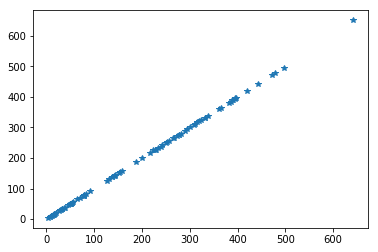

In [366]:
plt.plot(y_test, y_predict, '*')